# BRETXA DIGITAL 2020

### IMPORTACIÓ DE LLIBRERIES

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### CONEXIÓ AL DATASET

In [45]:
df_inicial= pd.read_csv('bbdd_escletxadigital2020-v4.csv')
df_inicial.head()

,ID,METODE,DATA,Codi_Districte,Nom_Districte,F0,F1,F2,RENDA,Q1,...,P5A_15rec,P5A_16rec,P5A_17rec,P5A_18rec,P5A_19rec,P5A_20rec,P2_LLAR,Longitud,Latitud,Pes
0,5,1,20201015,2,Eixample,3,1,1,3,1,...,1.0,1.0,2.0,1.0,1.0,1.0,8.0,2.156566,41.382082,0.741578
1,6,1,20201015,5,Sarrià - Sant Gervasi,3,1,1,5,2,...,1.0,1.0,2.0,2.0,1.0,1.0,17.0,2.140351,41.405319,0.572459
2,9,1,20201015,7,Horta - Guinardó,3,1,1,2,2,...,1.0,1.0,2.0,2.0,1.0,1.0,4.0,2.153140,41.425456,1.740063
3,12,1,20201015,2,Eixample,1,1,1,3,2,...,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.177373,41.406421,0.918977
4,13,1,20201015,1,Ciutat Vella,2,1,1,3,1,...,1.0,2.0,2.0,2.0,2.0,1.0,7.0,2.172285,41.384083,0.923780


In [46]:
df_inicial.shape

(2542, 135)

### FILTRATGE DE DADES

El dataset es molt extens pel que em centraré en les dades mes rellevants per a l'anàlisi. Per exemple, les columnes que comencen per ID,P2 o P3 son totes rellevants mentre que les preguntes sobre la covid o l'ús del wifi de l'ajuntanent no ho son.

In [47]:
columnes_rellevants = [
    'F1','ID','Codi_Districte','Nom_Districte','RENDA','Q1',
    'Q2','EDAT','P1','P1A','Q1A','P1B','P4','Longitud',
    'Latitud','Pes'
]
Prefixos = ('ID','P2','P3','P5','P14')
columnes_rellevants.extend([col for col in df_inicial.columns if col.startswith(Prefixos)])
df_filtrat = df_inicial[columnes_rellevants]
df_filtrat.head()

,F1,ID,Codi_Districte,Nom_Districte,RENDA,Q1,Q2,EDAT,P1,P1A,...,P5A_12rec,P5A_13rec,P5A_14rec,P5A_15rec,P5A_16rec,P5A_17rec,P5A_18rec,P5A_19rec,P5A_20rec,P2_LLAR
0,1,5,2,Eixample,3,1,64,5,1,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,8.0
1,1,6,5,Sarrià - Sant Gervasi,5,2,58,5,1,2.0,...,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,17.0
2,1,9,7,Horta - Guinardó,2,2,60,5,1,2.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,4.0
3,1,12,2,Eixample,3,2,78,7,1,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0
4,1,13,1,Ciutat Vella,3,1,47,4,1,2.0,...,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,7.0


### NETEJA DE DADES

#####  REGISTRES ERRONIS
Comprovo que no hi hagui registres amb respostes que invaliden l'enquesta. Com la F1 = 2, no residents a Barcelona

In [48]:

(df_filtrat['F1'] == 2).sum()

0

#####  DUPLICATS
Comprovo duplicats.

In [49]:
df_filtrat.duplicated().sum()

0

##### VALORS NULS
Comprovo valors nuls.

In [50]:
pd.set_option('display.max_rows', None)
df_filtrat.isnull().sum()

F1                   0
ID                   0
Codi_Districte       0
Nom_Districte        0
RENDA                0
Q1                   0
Q2                   0
EDAT                 0
P1                   0
P1A                203
Q1A                203
P1B               2341
P4                   0
Longitud            75
Latitud             75
Pes                  0
ID                   0
ID4                  0
ID4_PAIS          2135
ID5                  0
ID7                  0
ID8                  0
ID9                  0
P2_1                 0
P2_2                 0
P2_3                 0
P2_4                 0
P2_6                 0
P2_7                 0
P2_5                 0
P2_5B             2402
P2                   0
P2A                221
P2B               2394
P3_1               324
P3_2              1482
P3_3              2496
P3_0              2315
P3_95             2542
P3_98             2534
P3_99             2515
P5A_1              187
P5A_2              187
P5A_3      

Comprovo la coherència dels valors nuls. A la enquesta hi ha opcions de no sap no contesta que no son valors nuls, els nuls, doncs, provenen de preguntes condicionades a altres anteriors.

* Els nuls de P1A,Q1A son els que no tenen connexió a casa, si els sumem als que sí en tenen P1B donen el total de la mostra.
* Els 75 de Longitud i Latitud son els que no indiquen on viuen. En cas de voler utilitzar aquestes variables per a algun model o regressió lineal s'haurien d'eliminar.
* Els d'ID-PAIS son els que son espanyols.
* Els P2_5B, els que no disposen d'altres dispositius diferents als especificats a la llar.
* Els de P2_A del que no tenen smartphone
* Els de P2-B dels que si en tenen i tenen també una tarifa de dades.
* Els del grup P3 estàn formulades en multi-resposta ja que un mateix enquestat pot tenir correus diferents. Els nuls provenen dels que no tenen correu electrònic, personal, professional o indiferent o no responen a la pregunta no sap (tots) o no contesta.
* Els del grup P5 que son 187, son els que no utilitzen internet per a res. Per tant no poden contestar a moltes de les preguntes de l'enquesta.
* P5A_18_cod els que no han participat en cap moviment o grup.
* Els del grup P14 son els que no tenen dificultats per accedir a internet.
* Els de P2_LLAR son els que no tenen dispositius a casa.

Comprovat això, la gestió de valors nuls ja està feta, no cal eliminar fileres ni imputar valors.

##### TIPUS DE DADES
Comprovo el tipus de dades.

In [51]:
df_filtrat.dtypes

F1                  int64
ID                  int64
Codi_Districte      int64
Nom_Districte      object
RENDA               int64
Q1                  int64
Q2                  int64
EDAT                int64
P1                  int64
P1A               float64
Q1A               float64
P1B               float64
P4                  int64
Longitud          float64
Latitud           float64
Pes               float64
ID                  int64
ID4                 int64
ID4_PAIS          float64
ID5                 int64
ID7                 int64
ID8                 int64
ID9                 int64
P2_1                int64
P2_2                int64
P2_3                int64
P2_4                int64
P2_6                int64
P2_7                int64
P2_5                int64
P2_5B             float64
P2                  int64
P2A               float64
P2B               float64
P3_1              float64
P3_2              float64
P3_3              float64
P3_0              float64
P3_95       

Per optimitzar el model i fer-lo mes consistent i eficient, canvio els tipus de les dades. Gairebé tots podrien ser integer ja que son categories fetes amb nombres enters o l'edat (Q2) que també son enters. Hi ha un tipus Object i algun Float amb decimals.
Creo un bucle amb try except, per veure quines es poden convertir directament i quines no. 
Trio el tipus Int64 ja que permet valors nuls.

In [52]:
for col in df_filtrat:
    try:
        df_filtrat[col] = df_filtrat[col].astype('Int64')
        print(f"Columna {col} convertida OK")
    except Exception as exc:
        print(f"Columna {col} KO : {exc}")

Columna F1 convertida OK
Columna ID convertida OK
Columna Codi_Districte convertida OK
Columna Nom_Districte KO : invalid literal for int() with base 10: 'Eixample'
Columna RENDA convertida OK
Columna Q1 convertida OK
Columna Q2 convertida OK
Columna EDAT convertida OK
Columna P1 convertida OK
Columna P1A convertida OK
Columna Q1A convertida OK
Columna P1B convertida OK
Columna P4 convertida OK
Columna Longitud KO : cannot safely cast non-equivalent object to int64
Columna Latitud KO : cannot safely cast non-equivalent float64 to int64
Columna Pes KO : cannot safely cast non-equivalent object to int64
Columna ID convertida OK
Columna ID4 convertida OK
Columna ID4_PAIS convertida OK
Columna ID5 convertida OK
Columna ID7 convertida OK
Columna ID8 convertida OK
Columna ID9 convertida OK
Columna P2_1 convertida OK
Columna P2_2 convertida OK
Columna P2_3 convertida OK
Columna P2_4 convertida OK
Columna P2_6 convertida OK
Columna P2_7 convertida OK
Columna P2_5 convertida OK
Columna P2_5B co

C:\Users\ueret\AppData\Local\Temp\ipykernel_11988\1222524005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrat[col] = df_filtrat[col].astype('Int64')


Identifico les columnes que no canvien directament:

* Nom_Districte, que la deixarem com a tipus Object, ja que ha de ser text.
* Longitud, Latitud i Pes contenen decimals, així que les deixarem com a float.

In [53]:
df_filtrat.dtypes

F1                  Int64
ID                  Int64
Codi_Districte      Int64
Nom_Districte      object
RENDA               Int64
Q1                  Int64
Q2                  Int64
EDAT                Int64
P1                  Int64
P1A                 Int64
Q1A                 Int64
P1B                 Int64
P4                  Int64
Longitud          float64
Latitud           float64
Pes               float64
ID                  Int64
ID4                 Int64
ID4_PAIS            Int64
ID5                 Int64
ID7                 Int64
ID8                 Int64
ID9                 Int64
P2_1                Int64
P2_2                Int64
P2_3                Int64
P2_4                Int64
P2_6                Int64
P2_7                Int64
P2_5                Int64
P2_5B               Int64
P2                  Int64
P2A                 Int64
P2B                 Int64
P3_1                Int64
P3_2                Int64
P3_3                Int64
P3_0                Int64
P3_95       

##### OUTLIERS
Al tractarse, la majoria de variants de categoritzades en bins del 0 al 5, no tindrem outliers. Si volguèssim aplicar algun model amb alguna de les numèriques com edat (Q2), convindria visualitzar els possibles outliers amb un boxplot o scatterplot.
El que podem considerar es tractar com a outliers les respostes 95, 98 i 99 que corresponen altres respostes, no sap, no contesta i canviar aquests valors per nuls. Això facilitaria la visualització exploratòria per veure la distribució de les variables categòriques. En un context de projecte professional, hauríem de consultar si l'eliminació d'aquestes dades afecta a l'anàlisi, es a dir, quina importància te saber quanta gent a respost 95,98 o 99. De ser necessari també es podrien substituir aquest valors per 6,7 i 8. 
Decideixo veure quin percentatge de respostes amb aquest valors hi ha a les preguntes on son presents.


In [13]:
valors_comprovar = [95, 98, 99]
def calcular_percentatge(col):
    total = col.count() 
    freq = col.isin(valors_comprovar).sum() 
    if total > 0:
        percentatge = (freq / total) * 100
        return percentatge
    else:
        return 0

resultats = df_filtrat.apply(calcular_percentatge)
resultats = resultats[resultats > 0]
resultats

ID              0.118017
P1              0.078678
P1A             6.541257
Q1A             2.308679
P1B             5.970149
P4              0.314713
ID              0.118017
ID5             0.314713
P2_1            0.668765
P2_2            0.629426
P2_3            0.708104
P2_4            0.590087
P2_6            0.039339
P2_7            0.039339
P2_5            0.747443
P2              0.157356
P2A             1.895735
P2B            10.810811
P3_98         100.000000
P3_99         100.000000
P5A_1           0.339703
P5A_2           0.169851
P5A_3           0.679406
P5A_4           0.297240
P5A_5           0.636943
P5A_6           0.382166
P5A_7           0.169851
P5A_8           1.443737
P5A_9           0.891720
P5A_10          0.424628
P5A_11          0.467091
P5A_12          0.849257
P5A_13          0.806794
P5A_14          0.382166
P5A_15          1.316348
P5A_16          1.443737
P5A_17          0.764331
P5A_18          1.019108
P5A_19          0.424628
P5A_20          0.552017



En la majoria de casos el percentatge no arriba al 2%. Els casos en que sí ho fa son:

* P1A, Q1A i P1B en que es pregunta pel tipus de connexió i per la qualitat d'aquesta. Considero que no es rellevant ja que el fet de no saber-ho o usar tecnologies molt minoritàries no afecta al resultat general, simplement disminueix una mica la mostra.

* P2B en que es demana el motiu pel que no tenen tarifa de dades a internet. Un 10% es força elevat però hem de tenir en compte que es un 10% de la gent que no te tarifa de dades al mòbil, que es un percentatge molt petit del total de la mostra, i a més que el fet que no puguin aportar informació sobre el motiu no desvirtua el resultat de l'enquesta, tan sols merma una mica la mostra en aquesta pregunta.

* P3_98 i P3_99 formen part de una pregunta multi-resposta on es pot contestar mes d'un valor a la mateixa pregunta. En concret en aquestes dues hi van els valors dels que contesten no sap o no contesta a la pregunta de si te email. Podríem suposar que si no ho saben o no contesten vol dir que no en tenen, però només es una suposició. En qualsevol cas eliminar aquestes valors i passar-los a nuls no afecta per a res a la pregunta, ja que no l'estan contestant.

* P5_A18_Cod. Després de preguntar si participa a través d'internet a moviments o grups socials, en aquesta pregunta es demana "Tipus de moviment o grup en el que ha participat". Aquí la opció 5 es altres pel que només hi haurà No sap i No contesta. Un altre cop l'eliminació d'aquests valors no desvirtua el resultat, només en merma una mica la mostra d'aquesta sub-pregunta específica.

* P14_2Cod. Aquesta pregunta s'adreça només a aquells que han contestat que tenen alguna discapacitat que els hi dificulta l'accés a internet i a més han contestat que no disposen d'eines tecnològiques que els ajudin a superar aquesta dificultat. La pregunta concreta es "Per què no disposa de les eines tecnològiques que li permetin superar 
aquestes dificultats per accedir a Internet" i exactament un 12,5% han contestat que no ho saben.
Aprofundeixo en aquesta pregunta.

In [56]:
detall_P14_2cod = df_filtrat['P14_2cod'].value_counts()
print(detall_P14_2cod)

P14_2cod
3    14
2    11
4     7
1     3
Name: count, dtype: Int64


Representa una part ínfima de la mostra i, a mes, el fet de no conèixer la resposta no afecta al resultat de la pregunta general. Convertir no sap i no contesta en nul no afectarà al resultat.

Així doncs, veient la poca incidència que tenen en les dades i que en cap cas convertir-los en nuls resta valor ni desvirtua el dataset, decideixo convertir a valors nuls totes les respostes 95, 98 i 99. 

Comprovo que el canvi s'ha realitzat i no queden valors 95, 98 ni 99.

In [55]:
df_filtrat.replace(valors_comprovar, pd.NA, inplace=True)
valors_presents = df_filtrat.isin(valors_comprovar).any()
valors_presents.any()

C:\Users\ueret\AppData\Local\Temp\ipykernel_11988\4244934641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrat.replace(valors_comprovar, pd.NA, inplace=True)


False


##### ESTANDARDITZACIÓ
Al tractarse, la majoria, de dades categotitzades en respostes del 0 al 5 (tret d'ID4_PAIS), només tenim l'edat (Q2) com a possible dada a normalitzar o estandarditzar, a més aquesta dada també la tenim ja categoritzada (Edat), per tant no serà necessari.
Dono el dataset per filtrat.

In [57]:
df = df_filtrat
df.head()

,F1,ID,Codi_Districte,Nom_Districte,RENDA,Q1,Q2,EDAT,P1,P1A,...,P5A_12rec,P5A_13rec,P5A_14rec,P5A_15rec,P5A_16rec,P5A_17rec,P5A_18rec,P5A_19rec,P5A_20rec,P2_LLAR
0,1,5,2,Eixample,3,1,64,5,1,2,...,2,2,2,1,1,2,1,1,1,8
1,1,6,5,Sarrià - Sant Gervasi,5,2,58,5,1,2,...,2,1,2,1,1,2,2,1,1,17
2,1,9,7,Horta - Guinardó,2,2,60,5,1,2,...,1,1,1,1,1,2,2,1,1,4
3,1,12,2,Eixample,3,2,78,7,1,2,...,2,2,2,1,2,2,2,2,2,3
4,1,13,1,Ciutat Vella,3,1,47,4,1,2,...,1,1,2,1,2,2,2,2,1,7


In [58]:
df.shape

(2542, 88)


##### ENGINYERIA DE CARACTERÍSTIQUES: Creació de Variables

Em sembla rellevant poder crear una nova variable que faci de puntuació del nivell de digitalització de cada enquestat, atorgant un valor a cada resposta sobre aquest tema i realitzant una mena d'Scoring de l'ús de les TIC de cada enquestat. Assigno diferents puntuacions a preguntes clau per valorar el nivell de l'enquestat:

* A P1, Assigno 10 punts als enquestats que tenen consnexió d'internet a casa i 0 als que no.
* Els del grup P2_ fan referència a la quantitat de dispositius. Cada dispositiu serà un punt.
* P2 i P2A pregunten si tenen mòbil i tarifa de dades, amb resposta positiva, sumo 5 punts per la primera i 10 per la segona.
* Les P3_ les valoro en conjunt: 4 punts per la resposta 1 i 3 per cada resposta 2 o 3, finalment 0 punts pel 0.
* La P4 la valora segons la freqüència d'us de manera inversa al valor contestat.
* De les P5_ trio les que serán puntuades per freqüència de manera inversa.
* Les altres P5_ seran puntuades amb 1 punt per l'1 i 0 pel 2.

In [60]:
df ['P1_Scoring'] = np.where(df['P1'].fillna(0) == 1,10,0)

columnes_P2_ = df.filter(like='P2_').columns

df ['P2_Scoring'] = np.where(df['P2'].fillna(0)  == 1,5,0)
df ['P2A_Scoring'] = np.where(df['P2A'].fillna(0)  == 1,10,0)

columnes_P3_ = df.filter(like='P3_').columns
df['P3_Scoring'] = df[columnes_P3_].applymap(lambda x: 4 if x == 1 else 
                                            (3 if x in [2, 3] else 0)).sum(axis=1)

df['P4_Scoring'] = df['P4'].apply(lambda x: 6 if x == 1 else 
                                    (5 if x == 2 else 
                                     (4 if x == 3 else 
                                      (3 if x == 4 else 
                                       (2 if x == 5 else 
                                        (1 if x == 6 else 
                                         (0 if x == 7 else 0)))))))

columnes_P5A = df_filtrat.filter(regex='^P5A_([1-9]|1[0-9]|20)$').columns.tolist()
df['P5_Scoring'] = df[columnes_P5A].applymap(lambda x: 5 if x == 1 else 
                                             (3 if x == 2 else 
                                              (2 if x == 3 else 
                                               (1 if x == 4 else 0)))).sum(axis=1)

columnes_P5A_rec = df_filtrat.filter(regex=r'^P5A_([1-9]|1[0-9]|20)rec$').columns.tolist()
df['P5_rec_Scoring'] = 0  
for col in columnes_P5A_rec:
    df['P5_rec_Scoring'] += np.where(df[col].fillna(0) == 1, 1, 0)

df['Scoring'] = df[['P1_Scoring', 'P2_Scoring', 'P2A_Scoring', 'P3_Scoring', 'P4_Scoring', 
                     'P5_Scoring', 'P5_rec_Scoring', 'P2_LLAR']].sum(axis=1)

df['Scoring'] += df[columnes_P2_].sum(axis=1)

df[['Scoring', 'P1_Scoring', 'P2_Scoring', 'P2A_Scoring', 'P3_Scoring', 'P4_Scoring', 
           'P5_Scoring', 'P5_rec_Scoring', 'P2_LLAR'] + df.filter(like='P2_').columns.tolist()].head()

C:\Users\ueret\AppData\Local\Temp\ipykernel_11988\2862720490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['P1_Scoring'] = np.where(df['P1'].fillna(0) == 1,10,0)
C:\Users\ueret\AppData\Local\Temp\ipykernel_11988\2862720490.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['P2_Scoring'] = np.where(df['P2'].fillna(0)  == 1,5,0)
C:\Users\ueret\AppData\Local\Temp\ipykernel_11988\2862720490.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,Scoring,P1_Scoring,P2_Scoring,P2A_Scoring,P3_Scoring,P4_Scoring,P5_Scoring,P5_rec_Scoring,P2_LLAR,P2_1,P2_2,P2_3,P2_4,P2_6,P2_7,P2_5,P2_5B,P2_LLAR,P2_Scoring
0,96,10,5,0,0,6,34,12,8,3,2,1,2,0,0,0,<NA>,8,5
1,160,10,5,10,0,6,57,15,17,7,4,5,1,0,1,0,<NA>,17,5
2,94,10,5,0,0,6,41,15,4,2,2,0,0,0,0,0,<NA>,4,5
3,72,10,5,10,0,6,20,7,3,2,1,0,0,0,0,0,<NA>,3,5
4,124,10,5,10,0,6,51,14,7,3,1,3,0,2,0,0,<NA>,7,5


### ANÀLISI EXPLORATÒRI DE DADES (EDA)
Començo amb la descripció general d'estadístics bàsics.

In [19]:
df.describe()

,F1,ID,Codi_Districte,RENDA,Q1,Q2,EDAT,P1,P1A,Q1A,...,P5A_20rec,P2_LLAR,P1_Scoring,P2_Scoring,P2A_Scoring,P3_Scoring,P4_Scoring,P5_Scoring,P5_rec_Scoring,Scoring
count,2542.0,2539.0,2542.0,2542.0,2542.0,2542.0,2542.0,2540.0,2186.0,2285.0,...,2342.0,2527.0,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.0
mean,1.0,3021.192596,5.638474,2.946105,1.542486,50.509048,4.028718,1.079134,1.907136,7.820131,...,1.207088,5.070835,9.201416,4.565303,8.375295,4.795437,5.546420,36.835169,11.540126,96.706924
std,0.0,2067.796074,2.847616,1.376364,0.499867,18.449878,1.84001,0.270001,0.331524,1.566544,...,0.405306,2.962708,2.711272,1.409008,3.689544,2.163853,1.508995,17.052849,5.001039,34.699626
min,1.0,5.0,1.0,1.0,1.0,16.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.0,1286.5,3.0,2.0,1.0,35.0,3.0,1.0,2.0,7.0,...,1.0,3.0,10.000000,5.000000,10.000000,4.000000,6.000000,27.000000,9.000000,82.0
50%,1.0,2601.0,6.0,3.0,2.0,50.0,4.0,1.0,2.0,8.0,...,1.0,5.0,10.000000,5.000000,10.000000,4.000000,6.000000,40.000000,13.000000,104.0
75%,1.0,4563.5,8.0,4.0,2.0,64.0,5.0,1.0,2.0,9.0,...,1.0,7.0,10.000000,5.000000,10.000000,7.000000,6.000000,49.000000,15.000000,121.0
max,1.0,8058.0,10.0,5.0,3.0,96.0,7.0,2.0,4.0,10.0,...,2.0,24.0,10.000000,5.000000,10.000000,7.000000,6.000000,81.000000,20.000000,181.0


### EDAT
Podem veure que la mitjana d'edat (Q2) es de 50.5 anys amb una desviació estàndard força gran (18.44) i, per tant, hi ha força dispersió, es a dir, una bona representació de totes les edats. 

Faig un histograma i un boxplot per veure la distribució de la variable numèrica d'edat (Q2) i detectar posibles outliers.

Text(0, 0.5, 'ENQUESTATS')

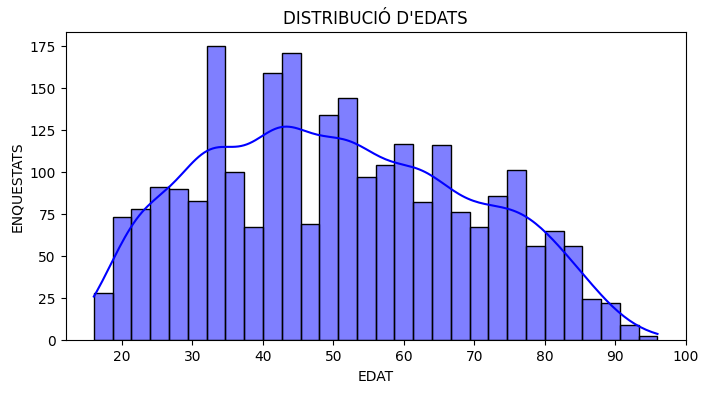

In [61]:
plt.figure(figsize= (8,4))
sns.histplot(df['Q2'],bins=30,kde=True, color='blue')
plt.title('DISTRIBUCIÓ D\'EDATS')
plt.xlabel('EDAT')
plt.ylabel('ENQUESTATS')

S'aprecia una distribució relativament normal, amb la salvetat que l'edat inicial de la mostra son 16 anys.

Destaquen un pic dels 32 als 35, tot i que, el màxim de la corba de distribució se situa entre els 40 i els 45.

Text(0.5, 1.0, 'BOXPLOT EDAT')

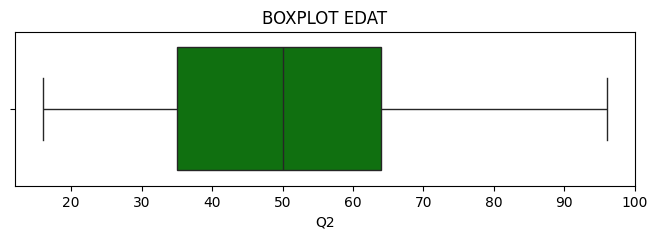

In [62]:

plt.figure(figsize= (8,2))
sns.boxplot(x=df['Q2'], color='green')
plt.title('BOXPLOT EDAT')

S'aprecia una distribució d'edats força simètrica. La mediana se situa als 50 anys, molt propera la mitjana de 50,5.

L'espai entre el Q1 i el Q3 es força ampli, per tant dins les edats centrals hi ha bastanta variabilitat. L'IQR se situa entre els 40 i el 60.

S'aprecia força simetria amb una mica més de concentració cap a les edats mes joves.
Els bigotis van des dels 16 anys fins als 96. No hi ha punts fora dels bigotis, com era de preveure no hi ha valors extrems o outliers.
##### Tenim una mostra d'edat molt equilibrada i variada i , per tant, força representativa de la societat.

### SCORING D'ÚS DE LES TIC
Visualitzant la distribució d'Scoring podrem veure, de manera general, quina distribució hi ha de l'ús de les tecnologies de la informació i la comunicació a la mostra.

Text(0, 0.5, 'ENQUESTATS')

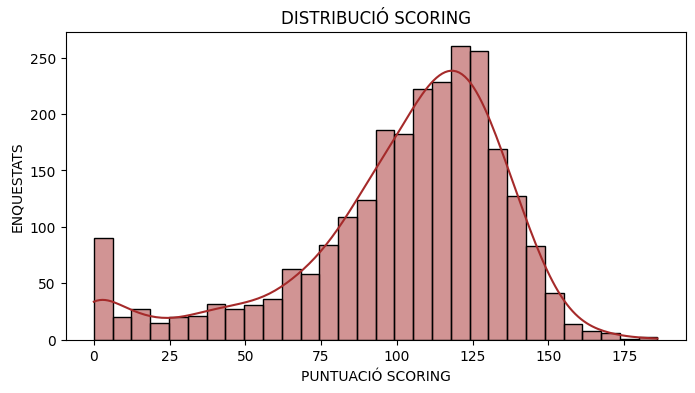

In [63]:
plt.figure(figsize= (8,4))
sns.histplot(df['Scoring'],bins=30,kde=True, color='brown')
plt.title('DISTRIBUCIÓ SCORING')
plt.xlabel('PUNTUACIÓ SCORING')
plt.ylabel('ENQUESTATS')

Es mostra una distribució amb forma de campana de gauss, es a dir normal, amb bastanta concentració a les puntuacions entre 100 i 125, on se situa el màxim de la corba.
No obstant s'observa un pic important a les puntuacions mes baixes de 0 a 5. Es va suavitzant de 5 a 30 punts on comença la corba principal. Es podria parlar d'una lleugera estructura bimodal.

Es força simètrica amb una lleugera asimetria cap a les puntuacions mes baixes.

#### La asimetria cap a les puntuacions baixes i sobretot el pic en les puntuacions mínimes posen de manifest que sí que hi ha una bretxa digital, es a dir una diferència pronunciada entre l'ús dels usuaris intensius de les TIC i els que gairebé no les utilitzen.

Text(0.5, 1.0, 'BOXPLOT SCORING')

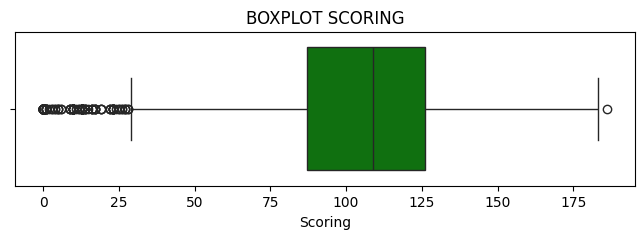

In [64]:
plt.figure(figsize= (8,2))
sns.boxplot(x=df['Scoring'], color='green')
plt.title('BOXPLOT SCORING')

Observem que el rang entre Q2 i Q3 es força estret, la majoria de distribució es concentra en un interval de puntuacions estret. 

Pel que fa a la simetria la mediana esta lleugerament a la dreta de la caixa entre Q2 i Q3, per tant hi ha una major concentració de dades a l'esquerra amb una menor puntucaió.

#### Podem veure com hi ha molts valors per fora els bigotis, concretament abans del Q1. Tants que, mes que considerarlos com a outliers i descartar-los, hem de pensar que això posa de manifest la existencia de la Bretxa digital.

Com no conec l'origen de la columna Pes, tot i que entenc que es tracta d'una ponderació, no la he utilitzat. Desconec amb quins criteris s'ha basat i la seva finalitat per això no l'he utilitzat. De totes maneres creo una columna Scoring_Ponderat tenint en compte la columna Pes per si fos necessària.

In [65]:
df['Scoring_Ponderat'] = df['Scoring']*df['Pes']
df[['Scoring','Pes','Scoring_Ponderat']].head()

C:\Users\ueret\AppData\Local\Temp\ipykernel_11988\3858074582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Scoring_Ponderat'] = df['Scoring']*df['Pes']


,Scoring,Pes,Scoring_Ponderat
0,96,0.741578,71.191488
1,160,0.572459,91.59344
2,94,1.740063,163.565922
3,72,0.918977,66.166344
4,124,0.923780,114.54872


### SCORING Vs EDAT
Comparant aquestes dues variables, podrem veure si hi ha una relació entre edat i nivell d'ús de les TIC. 

Faig un Scatterplot amb linia de regressió lineal.

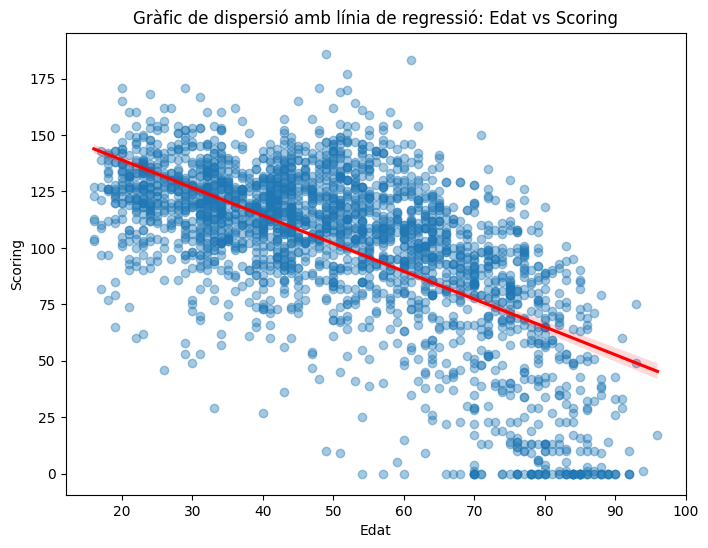

In [66]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Q2', y='Scoring', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.xlabel('Edat')
plt.ylabel('Scoring')
plt.title('Gràfic de dispersió amb línia de regressió: Edat vs Scoring')
plt.show()

Veiem que hi ha una clara relació entre les dues variables: a mes edat, menys puntuació.

Tot i que la línia de la regressió lineal indica una relació lineal decreixent o negativa, sembla clar que la relació no segueix un patró lineal sinó mes aviat parabòlic. Per això podríem parlar de relació no lineal quadràtica. 
Això indica que podria ser interessant aplicar algun altre model mes complex per comparar aquestes variables. De ser així potser caldria estandarditzar o normalitzar les dues variables.

També veiem un sector molt menys densament poblat entre les puntuacions menors de 50 punts i les properes a 0 que tornen a ser mes abundants. Això també ens dona una visualització de l'existència de la bretxa digital.
### La relació quadràtica inversa existent entre Scoring i Edat, ens indica que l'edat es un factor decisiu en el nivell d'ús de les TIC dels enquestats.
### El vuit existent entre les puntuacions mes baixes i les properes a 0 suggereixen l'existència real d'una bretxa digital.